In [57]:
import numpy as np
import matplotlib.pyplot as plt
from  PIL import Image
import os
import pandas as pd
target_size = (24, 24)
dogs = np.array([np.array(Image.open('Animals/dog/'+x).resize(target_size).convert('L')) for x in os.listdir('Animals/dog/') if os.path.isfile(os.path.join('Animals/dog/', x))])
cats = np.array([np.array(Image.open('Animals/cat/'+x).resize(target_size).convert('L'))  for x in os.listdir('Animals/cat/') if os.path.isfile(os.path.join('Animals/cat/', x))])


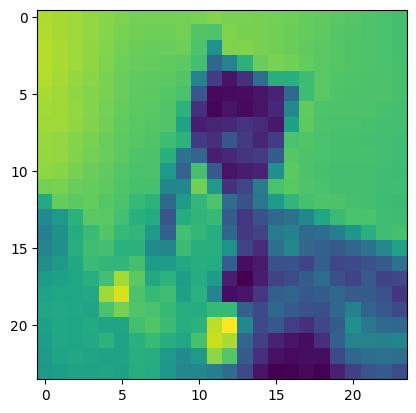

In [58]:
plt.imshow(cats[800])

In [59]:
from sklearn.model_selection import train_test_split
x=np.concatenate([dogs,cats])
y=np.concatenate([[0 for i in range(dogs.shape[0])],[1 for i in range(cats.shape[0])]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




dog:0
cat:1



1

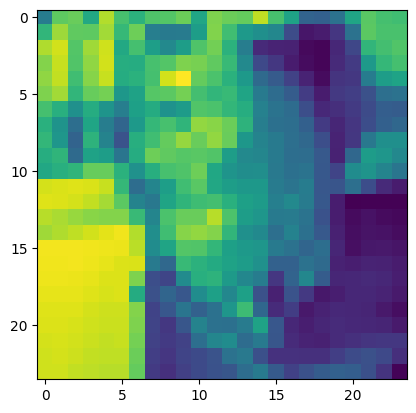

In [60]:
plt.imshow(x_train[0])
y_train[0]

In [61]:
import tensorflow as tf


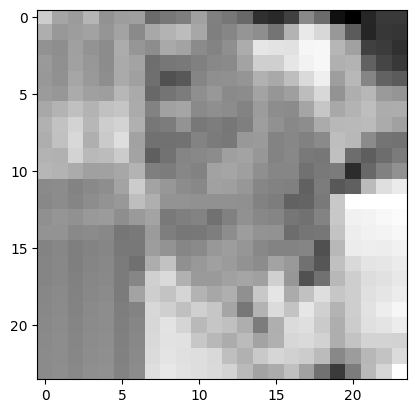

In [62]:
x_train=tf.keras.utils.normalize(x_train ,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(24, 24)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Ensure 'softmax' is a string
])

c:\Users\nouredinekn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5344 - loss: 0.7993
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5654 - loss: 0.6766
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5910 - loss: 0.6606
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6028 - loss: 0.6567
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5995 - loss: 0.6540
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6042 - loss: 0.6570
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6025 - loss: 0.6555
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6108 - loss: 0.6522
Epoch 9/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6034 - loss: 0.6545
Epoch 10/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6204 - loss: 0.6432


In [76]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 127.9513


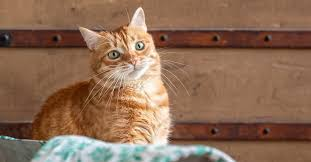

In [67]:
x=Image.open('Animals/test.jpg')
x

In [70]:
test=np.array(x.resize((24,24)).convert('L'))
prediction = np.argmax(model.predict(np.array([test])))
def cat_or_dog(x):
    if x==0:return 'dog' 
    elif x==1:return 'cat'
    else:return None

cat_or_dog(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'cat'

In [71]:
model.save("dog_cat.h5")

In [72]:
loaded_model = tf.keras.models.load_model("dog_cat.h5")


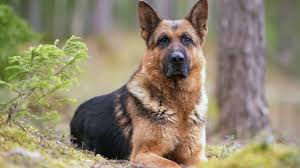

In [73]:
x=Image.open('Animals/test2.jpg')
test=np.array(x.resize((24,24)).convert('L'))
x

In [77]:
prediction = np.argmax(loaded_model .predict(np.array([test])))
cat_or_dog(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'dog'

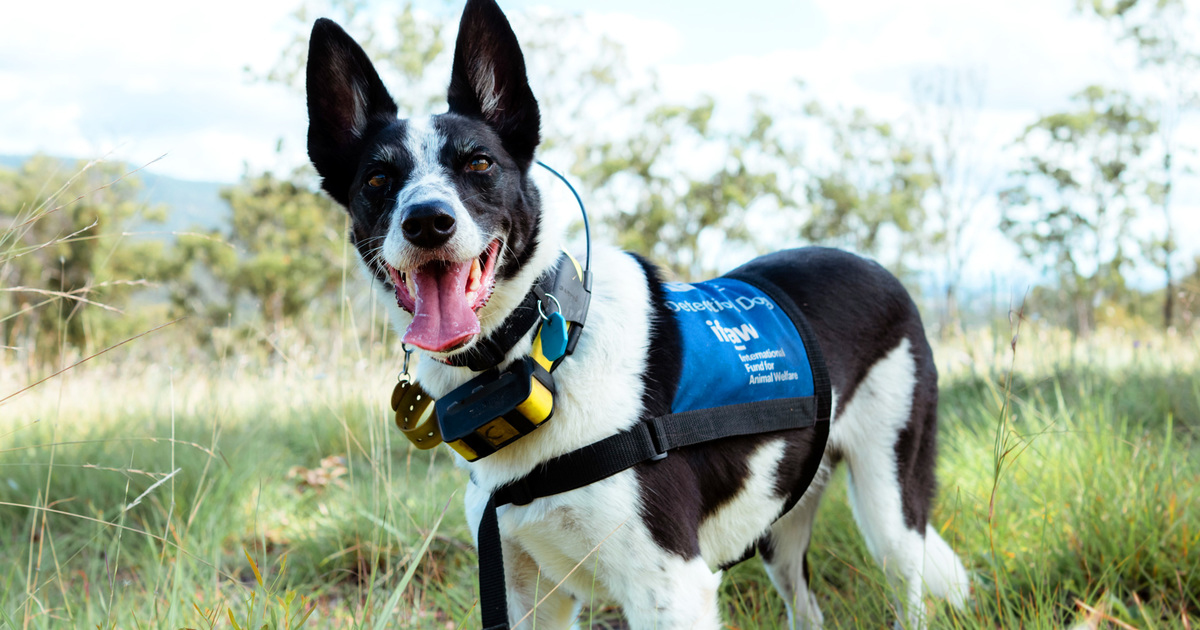

In [80]:
x=Image.open('Animals/test3.jpg')
x


In [81]:
test=np.array(x.resize((24,24)).convert('L'))
prediction = np.argmax(loaded_model .predict(np.array([test])))
cat_or_dog(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'dog'

#by Nouredine_kn